In [1]:
# Celda de código Python para importar librerías (ej. pandas, matplotlib, seaborn)
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust
import numpy as np
import pandas as pd

# Cargar el dataset de ejemplo
tips_df = sns.load_dataset("tips")
order = ["Thur","Fri","Sat","Sun"]

# Ver las primeras filas para entender la estructura
print(tips_df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### Incorrecto

El gráfico muestra la distribución de `total_bill` (violines), pero los puntos rojos que indican “mediana total\_bill” **son en realidad la mediana de `tip`**. Etiqueta y contenido no coinciden → conclusiones falsas.

* **Por qué es grave:** alguien podría comparar mediana (puntos rojos) con la forma del violín y sacar conclusiones erradas sobre `total_bill`.
* **Arreglo:** calcular y graficar la estadística correcta (mediana de la misma variable), o si se superponen estadísticas distintas, **etiquetarlas claramente** y usar leyenda descriptiva.

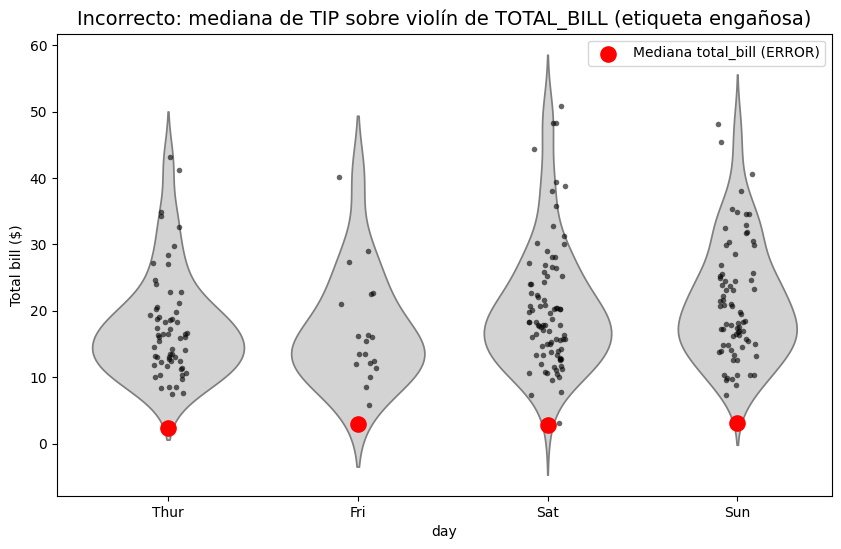

In [7]:
# -------------------------
# 1) Incorrecto (engaña)
# -------------------------
plt.figure(figsize=(10,6))
sns.violinplot(
    data=tips_df, x="day", y="total_bill",
    order=order, inner=None, color="lightgray"
)
sns.stripplot(
    data=tips_df, x="day", y="total_bill",
    order=order, jitter=True, size=4, color="black", alpha=0.6
)
# ERROR intencionado: calculo la mediana de TIP (no de total_bill) 
# pero la pinto y la etiqueto como "Mediana total_bill" -> engañoso
medians_tip = tips_df.groupby("day", observed=False)["tip"].median().reindex(order)
for i, m in enumerate(medians_tip):
    plt.scatter(i, m, color="red", s=120, zorder=6, label="Mediana total_bill (ERROR)" if i==0 else "")
plt.title("Incorrecto: mediana de TIP sobre violín de TOTAL_BILL (etiqueta engañosa)", fontsize=14)
plt.ylabel("Total bill ($)")
plt.legend()
plt.show()

### Malo

El gráfico muestra la **media** por día (correcta) pero **no** muestra dispersión (IQR, desviación estándar, outliers, tamaño de muestra). Con solo la media es fácil engañarse: medias cercanas pueden provenir de distribuciones muy distintas.

* **Arreglo:** añadir barras de error (std o SEM), o mejor aún usar boxplot/violin + puntos, o mostrar el `n` por barra. Si la intención es comparar medias, mostrar intervalos de confianza o tests estadísticos.

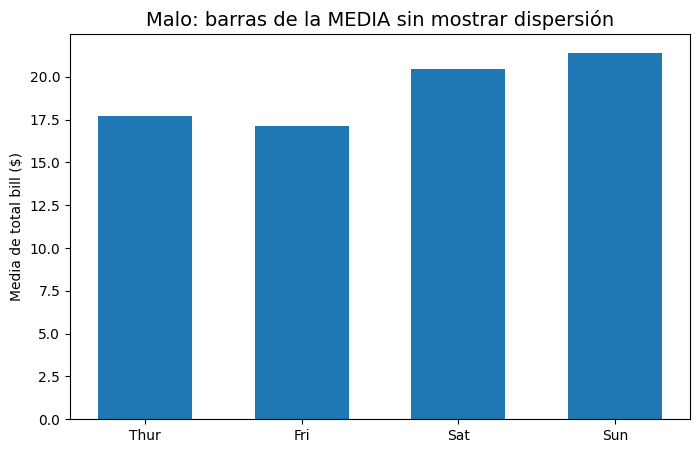

In [3]:
# -------------------------
# 2) Malo (oculta info)
# -------------------------
plt.figure(figsize=(8,5))
means = tips_df.groupby("day", observed=False)["total_bill"].mean().reindex(order)
x = np.arange(len(order))
plt.bar(x, means, width=0.6)
plt.xticks(x, order)
plt.title("Malo: barras de la MEDIA sin mostrar dispersión", fontsize=14)
plt.ylabel("Media de total bill ($)")
# nota: no hay barras de error, no hay información de spread ni outliers
plt.show()

### Feo pero correcto
Los datos son correctos (violines, puntos y medianas reales), pero la estética (colores chillones, fuente monoespaciada, marcadores enormes, fondo amarillo) dificultan la lectura y cansan la vista.

**Arreglo**: usar paleta neutra/consistente, tamaños de marcador razonables, tipografía legible, contraste adecuado y no rotar innecesariamente etiquetas.

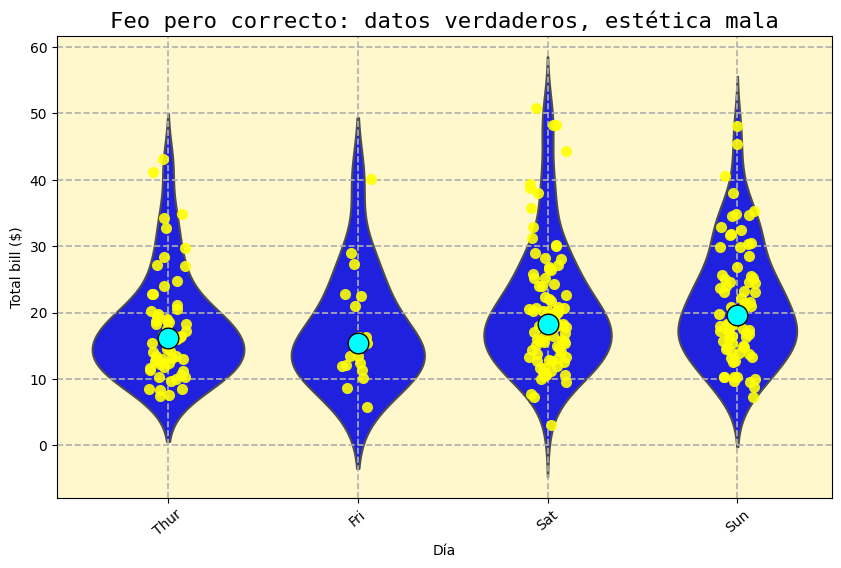

In [10]:
# -------------------------
# 3) Feo pero correcto
# -------------------------
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.set_facecolor("#fff8cc")                # fondo discordante
sns.violinplot(
    data=tips_df, x="day", y="total_bill",
    order=order, inner=None, linewidth=1.5,
    color="blue"                        # color chillón
)
sns.stripplot(
    data=tips_df, x="day", y="total_bill",
    order=order, jitter=True, size=8, color="yellow", alpha=0.9
)
medians = tips_df.groupby("day", observed=False)["total_bill"].median().reindex(order)
for i, m in enumerate(medians):
    plt.scatter(i, m, color="cyan", s=220, zorder=5, edgecolor="black")
plt.title("Feo pero correcto: datos verdaderos, estética mala", fontsize=16, fontfamily="monospace")
plt.xlabel("Día", fontsize=10)
plt.ylabel("Total bill ($)", fontsize=10)
plt.xticks(rotation=40)                     # etiquetas rotadas y poco legibles
plt.grid(True, linestyle="--", linewidth=1.2)
plt.show()

### La Alternativa Correcta: Sina Plots con Mediana (Figura 9-2)

El uso de *sina plots* representa una estrategia mucho más robusta y transparente para visualizar distribuciones de datos continuos, como los totales de la cuenta en el dataset `tips`. Esta técnica mejora significativamente la comprensión de la información por varias razones:

1. **Visualización completa de la distribución:**
   A diferencia de las barras de error, los *sina plots* muestran cada observación individual a lo largo del eje vertical, permitiendo apreciar la forma, la dispersión y la densidad de los datos. Esto hace evidente si hay asimetrías, agrupamientos o valores atípicos, que podrían ser críticos para la interpretación.

2. **Uso de estadísticas robustas:**
   La mediana se superpone como un punto destacado sobre la distribución, proporcionando una medida de tendencia central resistente a valores extremos. A diferencia de la media, la mediana no se ve sesgada por observaciones atípicas, ofreciendo un resumen más confiable del “centro” de la distribución.

3. **Claridad y precisión:**
   Al combinar la representación de cada dato con la mediana, se logra un equilibrio entre detalle y síntesis. Se evita la ambigüedad de las barras de error y se comunica de manera explícita la variabilidad real de los datos.

4. **Interpretación más intuitiva:**
   Este tipo de gráfico facilita comparaciones entre grupos, ya que se puede ver simultáneamente la mediana, la dispersión y la forma de cada conjunto. Los analistas pueden identificar rápidamente diferencias entre días, tendencias y posibles outliers sin depender de supuestos estadísticos ocultos.

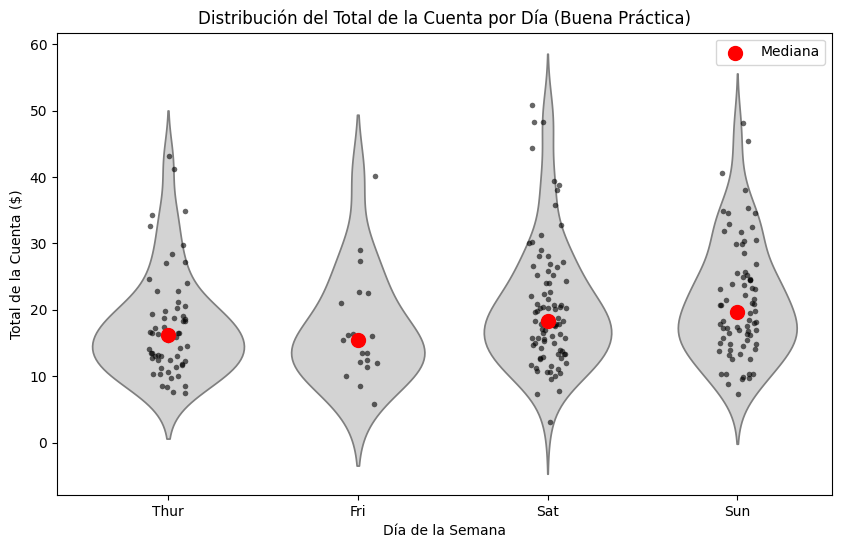

      mediana       q1       q3       mad      IQR
day                                               
Thur    16.20  12.4425  20.1550  5.715432   7.7125
Fri     15.38  12.0950  21.7500  5.974887   9.6550
Sat     18.24  13.9050  24.7400  7.368533  10.8350
Sun     19.63  14.9875  25.5975  7.798488  10.6100


In [5]:
# -------------------------
# 4) Correcto
# -------------------------
# Crear figura
plt.figure(figsize=(10, 6))

# Sina plot para mostrar distribución completa
sns.violinplot(
    data=tips_df,
    x="day",
    y="total_bill",
    order=order,
    inner=None,   # ocultamos caja interna para usar solo puntos
    color="lightgray"
)
sns.stripplot(
    data=tips_df,
    x="day",
    y="total_bill",
    order=order,
    jitter=True,
    size=4,
    color="black",
    alpha=0.6
)

# Calcular y graficar la mediana
medians = tips_df.groupby("day", observed=False)["total_bill"].median().reindex(order)
for i, median in enumerate(medians):
    plt.scatter(i, median, color="red", s=100, zorder=3, label="Mediana" if i==0 else "")

# Etiquetas y título
plt.title("Distribución del Total de la Cuenta por Día (Buena Práctica)")
plt.xlabel("Día de la Semana")
plt.ylabel("Total de la Cuenta ($)")
plt.legend()
plt.show()

# Análisis numérico
tips_df = sns.load_dataset("tips")

stats_robust = tips_df.groupby("day", observed=False)["total_bill"].agg(
    mediana="median",
    q1=lambda x: x.quantile(0.25),
    q3=lambda x: x.quantile(0.75),
    mad=lambda x: robust.mad(x)
).reindex(["Thur", "Fri", "Sat", "Sun"])

stats_robust["IQR"] = stats_robust["q3"] - stats_robust["q1"]

print(stats_robust)
